In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("dos_attacks.csv")

In [3]:
df.head(5)

,protocol,flow_duration,total_forward_packets,total_backward_packets,total_forward_packets_length,total_backward_packets_length,forward_packet_length_mean,backward_packet_length_mean,forward_packets_per_second,backward_packets_per_second,forward_iat_mean,backward_iat_mean,flow_iat_mean,flow_packets_per_seconds,flow_bytes_per_seconds,label
0,17,2468,4,0,1580.0,0.0,395.0,0.0,1620.745543,0.0,822.666667,0.0,822.666667,1620.745543,6.401945e+05,DrDoS_DNS
1,17,133,4,0,5888.0,0.0,1472.0,0.0,30075.187970,0.0,44.333333,0.0,44.333333,30075.187970,4.427068e+07,DrDoS_DNS
2,17,33509,200,0,88000.0,0.0,440.0,0.0,5968.545764,0.0,168.386935,0.0,168.386935,5968.545764,2.626160e+06,DrDoS_DNS
3,17,288495,200,0,88000.0,0.0,440.0,0.0,693.252916,0.0,1449.723618,0.0,1449.723618,693.252916,3.050313e+05,DrDoS_DNS
4,17,9,2,0,2062.0,0.0,1031.0,0.0,222222.222222,0.0,9.000000,0.0,9.000000,222222.222222,2.291111e+08,DrDoS_DNS


In [4]:
df.shape

(33925, 16)

In [5]:
df.columns = [x.strip() for x in df.columns]

In [6]:
df.label.value_counts()

DrDoS_DNS    32797
BENIGN        1128
Name: label, dtype: int64

In [7]:
for i,y in enumerate(df.columns):
    print(f"{y} - column",end="\n")
    # print(df[y].value_counts(),end="\n")
    print(f"{df[y].nunique()} - UNIQUE VALUES")

protocol - column
1 - UNIQUE VALUES
flow_duration - column
13386 - UNIQUE VALUES
total_forward_packets - column
70 - UNIQUE VALUES
total_backward_packets - column
3 - UNIQUE VALUES
total_forward_packets_length - column
1653 - UNIQUE VALUES
total_backward_packets_length - column
115 - UNIQUE VALUES
forward_packet_length_mean - column
1509 - UNIQUE VALUES
backward_packet_length_mean - column
116 - UNIQUE VALUES
forward_packets_per_second - column
14141 - UNIQUE VALUES
backward_packets_per_second - column
678 - UNIQUE VALUES
forward_iat_mean - column
14245 - UNIQUE VALUES
backward_iat_mean - column
29 - UNIQUE VALUES
flow_iat_mean - column
14915 - UNIQUE VALUES
flow_packets_per_seconds - column
14145 - UNIQUE VALUES
flow_bytes_per_seconds - column
30066 - UNIQUE VALUES
label - column
2 - UNIQUE VALUES


In [8]:
df.isna().mean().to_dict()

{'protocol': 0.0,
 'flow_duration': 0.0,
 'total_forward_packets': 0.0,
 'total_backward_packets': 0.0,
 'total_forward_packets_length': 0.0,
 'total_backward_packets_length': 0.0,
 'forward_packet_length_mean': 0.0,
 'backward_packet_length_mean': 0.0,
 'forward_packets_per_second': 0.0,
 'backward_packets_per_second': 0.0,
 'forward_iat_mean': 0.0,
 'backward_iat_mean': 0.0,
 'flow_iat_mean': 0.0,
 'flow_packets_per_seconds': 0.0,
 'flow_bytes_per_seconds': 0.0,
 'label': 0.0}

<AxesSubplot:>

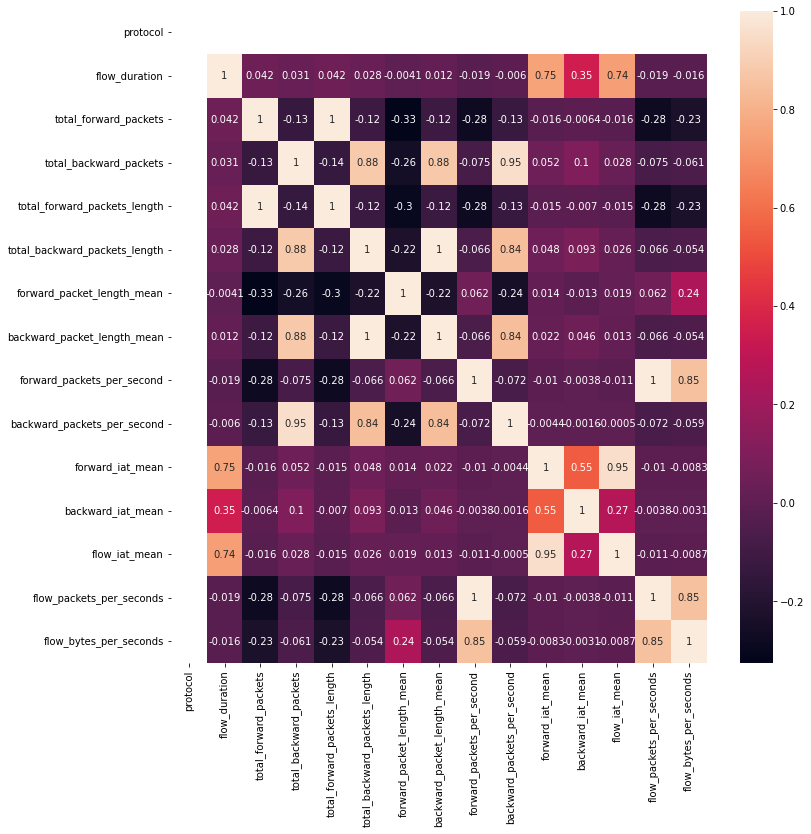

In [9]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)

### Check class imbalance

In [10]:
df.label.value_counts().reset_index()

,index,label
0,DrDoS_DNS,32797
1,BENIGN,1128


In [11]:
df.label.loc[df.label == "BENIGN"] = 0
df.label.loc[df.label == "DrDoS_DNS"] = 1

/var/folders/dy/1q10xsj11l9b7f9xnnqpzqkh0000gn/T/ipykernel_88208/655468322.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.label.loc[df.label == "BENIGN"] = 0
/var/folders/dy/1q10xsj11l9b7f9xnnqpzqkh0000gn/T/ipykernel_88208/655468322.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.label.loc[df.label == "DrDoS_DNS"] = 1


In [12]:
df.label.value_counts()

1    32797
0     1128
Name: label, dtype: int64

label
0     1128
1    32797
Name: forward_packets_per_second, dtype: int64


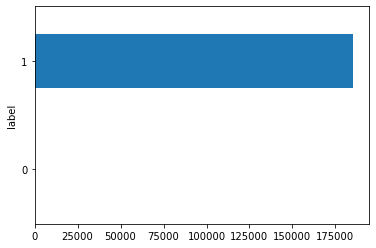

In [13]:
df.groupby("label")["forward_packets_per_second"].mean().plot(kind='barh')
print(df.groupby("label")["forward_packets_per_second"].count())

In [14]:
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,precision_score,f1_score
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline

In [15]:
X = df.iloc[:,:-1]
Y = df.label.to_list()

In [16]:
smote = SMOTE(sampling_strategy='minority',random_state=42)

In [17]:
X_sm,Y_sm = smote.fit_resample(X,Y)

In [40]:
x_train,x_test,y_train,y_test = train_test_split(X_sm,Y_sm,test_size=0.3,random_state=1)

In [19]:
scaler = MinMaxScaler()
scaler.fit(x_train,y_train)

MinMaxScaler()

In [20]:
x_train_scaled = scaler.transform(x_train)

In [21]:
x_test_scaled = scaler.transform(x_test)

In [22]:
log_reg = LogisticRegression()
log_reg.fit(x_train_scaled,y_train)

LogisticRegression()

In [23]:
y_pred = log_reg.predict(x_test_scaled)
# Finding accuracy by comparing actual response values(y_test)with predicted response value(y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))
# Providing sample data and the model will make prediction out of that data
print(f1_score(y_test,y_pred))

Accuracy: 0.9979165608008537
0.997955418141924


In [24]:
x_test['label'] = y_pred

In [41]:
x_test

,protocol,flow_duration,total_forward_packets,total_backward_packets,total_forward_packets_length,total_backward_packets_length,forward_packet_length_mean,backward_packet_length_mean,forward_packets_per_second,backward_packets_per_second,forward_iat_mean,backward_iat_mean,flow_iat_mean,flow_packets_per_seconds,flow_bytes_per_seconds
27287,17,213680,200,0,88000.000000,0.000000,440.000000,0.000000,935.979034,0.000000,1073.768844,0.000000,1073.768844,935.979034,4.118308e+05
21702,17,30130,178,0,77888.000000,0.000000,437.573034,0.000000,5907.733156,0.000000,170.225989,0.000000,170.225989,5907.733156,2.585065e+06
18166,17,17618,200,0,88000.000000,0.000000,440.000000,0.000000,11352.026337,0.000000,88.532663,0.000000,88.532663,11352.026337,4.994892e+06
34121,17,20803,2,2,66.595144,150.748407,33.297572,75.374204,96.135917,96.135917,2.000000,3.656449,6934.633890,192.271833,1.044721e+04
8875,17,903,4,0,2576.000000,0.000000,644.000000,0.000000,4429.678848,0.000000,301.000000,0.000000,301.000000,4429.678848,2.852713e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42758,17,20893,2,2,78.785414,150.657503,39.392707,75.328752,95.724641,95.724641,1.278541,1.278541,6964.421599,191.449281,1.098165e+04
23769,17,20644,2,2,62.000000,94.000000,31.000000,47.000000,96.880450,96.880450,1.000000,2.000000,6881.333333,193.760899,7.556675e+03
10489,17,15,2,0,2868.000000,0.000000,1434.000000,0.000000,133333.333333,0.000000,15.000000,0.000000,15.000000,133333.333333,1.912000e+08
60423,17,20736,2,2,76.210833,203.789167,38.105416,101.894584,96.447820,96.447820,3.000000,3.000000,6912.200516,192.895639,1.350269e+04


In [26]:
predict = pd.DataFrame(log_reg.coef_[0])

In [27]:
predict["features"] = X.columns
predict.columns = ["coeffcients","Features"]

In [28]:
predict

,coeffcients,Features
0,0.000000,protocol
1,-6.103924,flow_duration
2,1.630979,total_forward_packets
3,-8.235470,total_backward_packets
4,2.931269,total_forward_packets_length
5,-4.820583,total_backward_packets_length
6,7.872188,forward_packet_length_mean
7,-4.783317,backward_packet_length_mean
8,2.880999,forward_packets_per_second
9,-6.611126,backward_packets_per_second


/opt/homebrew/Caskroom/miniconda/base/envs/python_env/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='coeffcients', ylabel='Features'>

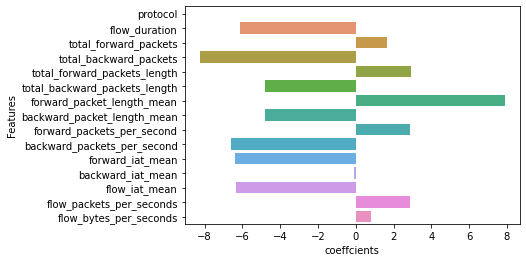

In [29]:
sns.barplot(predict.coeffcients,predict.Features)

In [30]:
pipe = Pipeline(
        steps= [
            
            ("scaler",MinMaxScaler()),
            ("reg",LogisticRegression())
        ]
    )

In [31]:
[X.loc[0,:].to_list()]

[[17.0,
  2468.0,
  4.0,
  0.0,
  1580.0,
  0.0,
  395.0,
  0.0,
  1620.7455429497568,
  0.0,
  822.6666666666667,
  0.0,
  822.6666666666667,
  1620.7455429497568,
  640194.4894651539]]

In [32]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('reg', LogisticRegression())])

In [33]:
pipe.predict_log_proba([df[df.label != 1].iloc[1,:-1]])

/opt/homebrew/Caskroom/miniconda/base/envs/python_env/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[-9.14467240e-05, -9.29979973e+00]])

In [34]:
import pickle

In [35]:
pickle.dump(pipe, open("model.pkl", 'wb'))

In [36]:
model = pickle.load(open("model.pkl","rb"))

In [37]:
model.predict([df[df.label != 1].iloc[1,:-1]])

/opt/homebrew/Caskroom/miniconda/base/envs/python_env/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([0])

In [38]:
x_test[x_test.label != 1]

,protocol,flow_duration,total_forward_packets,total_backward_packets,total_forward_packets_length,total_backward_packets_length,forward_packet_length_mean,backward_packet_length_mean,forward_packets_per_second,backward_packets_per_second,forward_iat_mean,backward_iat_mean,flow_iat_mean,flow_packets_per_seconds,flow_bytes_per_seconds,label
34121,17,20803,2,2,66.595144,150.748407,33.297572,75.374204,96.135917,96.135917,2.000000,3.656449,6934.633890,192.271833,10447.213845,0
44067,17,20911,2,2,88.262569,142.759312,44.131285,71.379656,95.642177,95.642177,2.021881,1.510940,6970.428150,191.284354,11047.688111,0
46341,17,20620,2,2,79.051853,273.896294,39.525927,136.948147,96.989603,96.989603,3.000000,3.000000,6873.592599,193.979206,17116.185539,0
64779,17,164155,2,2,57.381995,124.892940,28.690997,62.446470,12.368613,12.368613,56.107060,2.422749,54718.501760,24.737227,1090.584709,0
65019,17,20783,2,2,72.336408,188.191626,36.168204,94.095813,96.228507,96.228507,3.000000,2.264017,6927.960255,192.457014,12535.071454,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56412,17,47344,2,2,76.215815,188.388467,38.107907,94.194233,42.243757,42.243757,3.043163,1.978419,15781.431746,84.487514,5588.997228,0
42758,17,20893,2,2,78.785414,150.657503,39.392707,75.328752,95.724641,95.724641,1.278541,1.278541,6964.421599,191.449281,10981.654749,0
23769,17,20644,2,2,62.000000,94.000000,31.000000,47.000000,96.880450,96.880450,1.000000,2.000000,6881.333333,193.760899,7556.675063,0
60423,17,20736,2,2,76.210833,203.789167,38.105416,101.894584,96.447820,96.447820,3.000000,3.000000,6912.200516,192.895639,13502.694735,0


In [42]:
x_test.to_csv("test.csv",index=False)